In [1]:
from lsst.daf.butler import Butler
import numpy as np
import os
from matplotlib import pyplot as plt

In [3]:
REPO = "/epyc/ssd/users/kmrakovc/DATA/rc2_subset/SMALL_HSC/"
OUTPUT_COLL = "u/kmrakovc/single_frame_injection_09"
# Instantiate a butler.
butler = Butler(REPO)

In [4]:
injected_calexp = []
calexp = []
registry = butler.registry
length = len(list(registry.queryDatasets("injected_calexp", collections=OUTPUT_COLL, instrument='HSC')))
for i,ref in enumerate(registry.queryDatasets("injected_calexp", collections=OUTPUT_COLL, instrument='HSC')):
    injected_calexp.append(butler.get(
        "injected_calexp",
        dataId=ref.dataId,
        collections=OUTPUT_COLL,
    ))
    calexp.append(butler.get(
        "calexp",
        dataId=ref.dataId,
        collections=OUTPUT_COLL,
    ))
    print(i+1, "/", length)

1 / 234
2 / 234
3 / 234
4 / 234
5 / 234
6 / 234
7 / 234
8 / 234
9 / 234
10 / 234
11 / 234
12 / 234
13 / 234
14 / 234
15 / 234
16 / 234
17 / 234
18 / 234
19 / 234
20 / 234
21 / 234
22 / 234
23 / 234
24 / 234
25 / 234
26 / 234
27 / 234
28 / 234
29 / 234
30 / 234
31 / 234
32 / 234
33 / 234
34 / 234
35 / 234
36 / 234
37 / 234
38 / 234
39 / 234
40 / 234
41 / 234
42 / 234
43 / 234
44 / 234
45 / 234
46 / 234
47 / 234
48 / 234
49 / 234
50 / 234
51 / 234
52 / 234
53 / 234
54 / 234
55 / 234
56 / 234
57 / 234
58 / 234
59 / 234
60 / 234
61 / 234
62 / 234
63 / 234
64 / 234
65 / 234
66 / 234
67 / 234
68 / 234
69 / 234
70 / 234
71 / 234
72 / 234
73 / 234
74 / 234
75 / 234
76 / 234
77 / 234
78 / 234
79 / 234
80 / 234
81 / 234
82 / 234
83 / 234
84 / 234
85 / 234
86 / 234
87 / 234
88 / 234
89 / 234
90 / 234
91 / 234
92 / 234
93 / 234
94 / 234
95 / 234
96 / 234
97 / 234
98 / 234
99 / 234
100 / 234
101 / 234
102 / 234
103 / 234
104 / 234
105 / 234
106 / 234
107 / 234
108 / 234
109 / 234
110 / 234
111 / 23

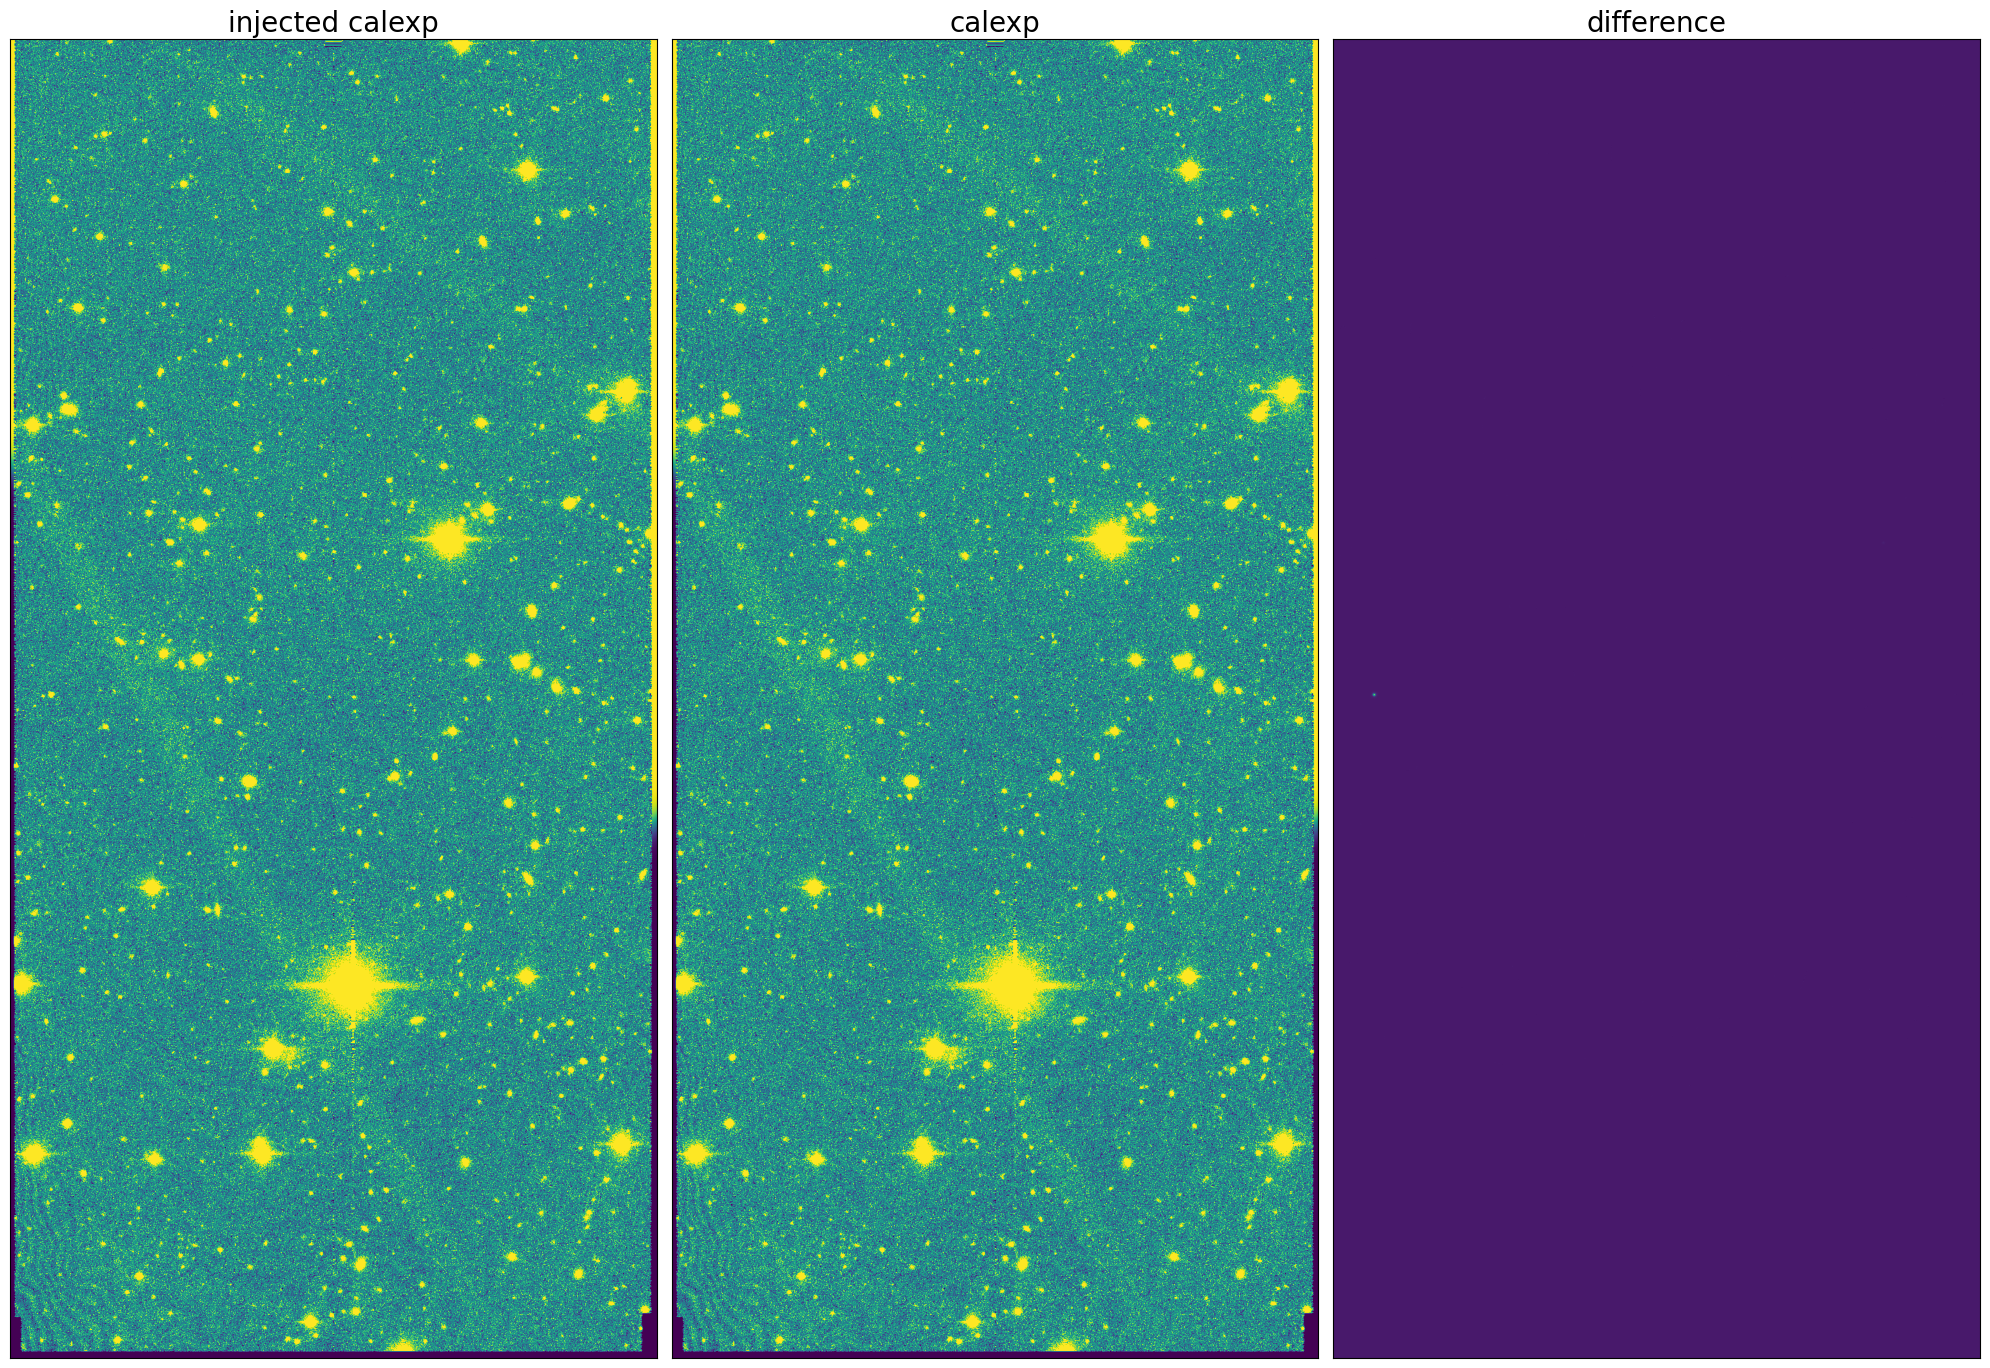

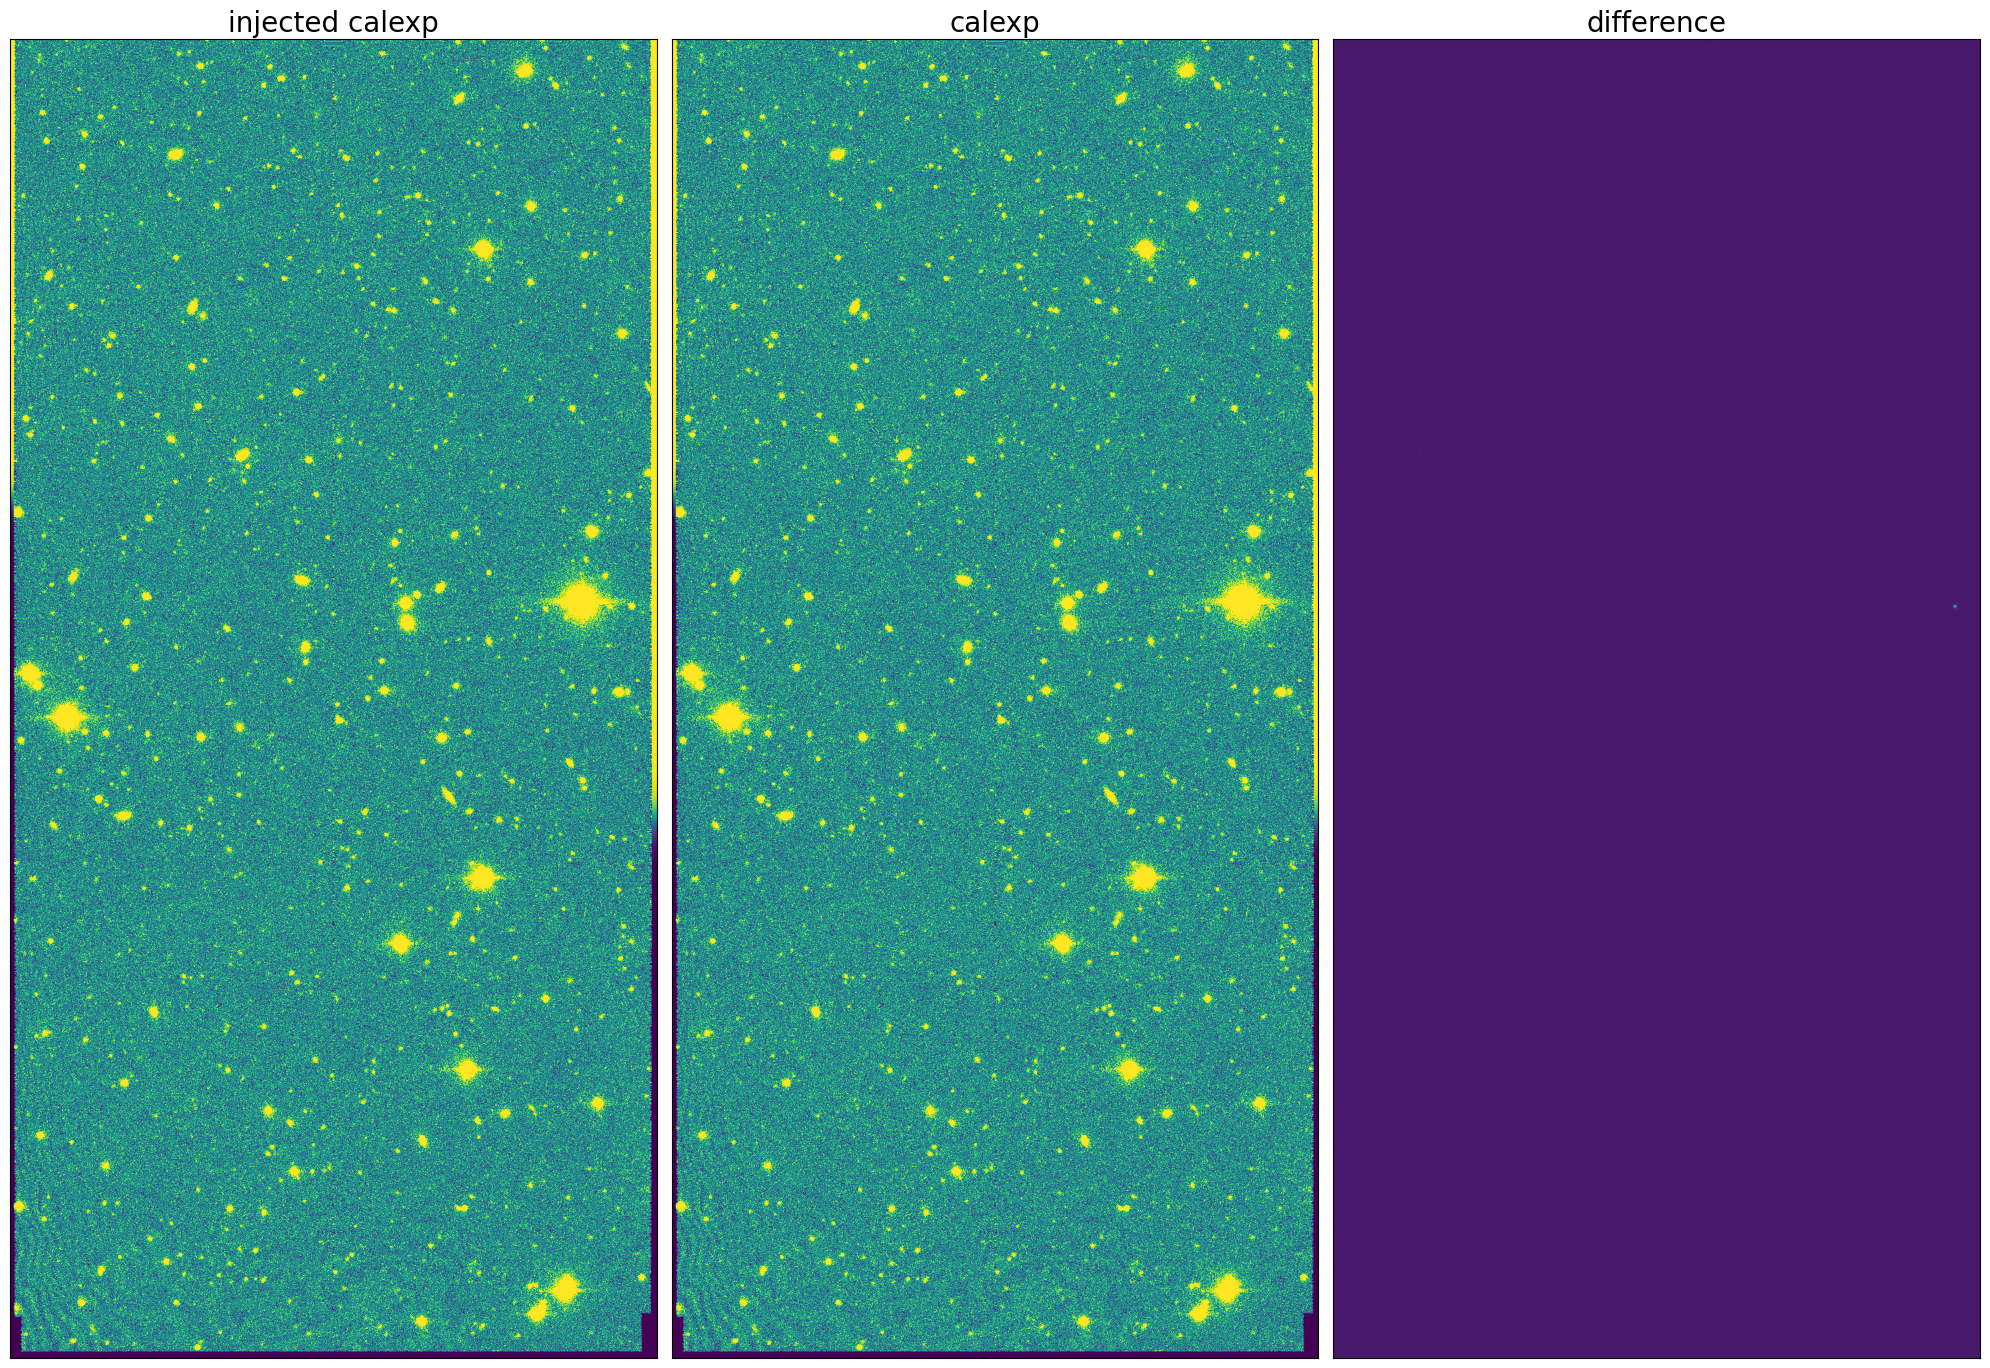

In [5]:
for i in range(2):# (len(calexp)):
    fig, ax = plt.subplots(1,3, figsize=(20,20))
    ax[0].imshow(np.tanh(injected_calexp[i].image.array))
    ax[1].imshow(np.tanh(calexp[i].image.array))
    ax[2].imshow(injected_calexp[i].image.array-calexp[i].image.array)
    ax[0].set_xticks([])
    ax[1].set_xticks([])
    ax[2].set_xticks([])
    ax[0].set_yticks([])
    ax[1].set_yticks([])
    ax[2].set_yticks([])
    ax[0].set_title("injected calexp", size = 20)
    ax[1].set_title("calexp", size = 20)
    ax[2].set_title("difference", size = 20)
    fig.tight_layout()
    plt.show()

In [6]:
def split(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    if arr.shape[0] % nrows != 0:
        arr = np.vstack([arr, np.zeros(shape = (nrows -(arr.shape[0]%nrows), arr.shape[1]))])
    if arr.shape[1] % ncols != 0:
        arr = np.hstack([arr, np.zeros(shape = (arr.shape[0], ncols-(arr.shape[1]%ncols)))])
    return (arr.reshape(arr.shape[0]//nrows, nrows, -1, ncols).swapaxes(1,2).reshape(-1, nrows, ncols))

In [54]:
bitwise_mask = np.where(np.bitwise_and(injected_calexp[0].mask.array, injected_calexp[0].mask.getPlaneBitMask('INJECTED')), True, False)
mask = (injected_calexp[0].image.array-calexp[0].image.array) * bitwise_mask
mask = (mask > (mask.mean()+mask.std()))
mask = (mask & bitwise_mask)
split_injected_calexp = split (injected_calexp[0].image.array, 512, 512)
split_calexp = split (calexp[0].image.array, 512, 512)
split_mask = split (mask, 512, 512)

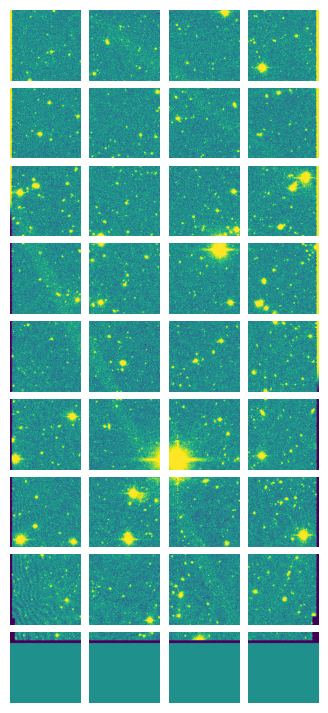

In [21]:
row = int(np.ceil(injected_calexp[0].image.array.shape[0]/512))
column = int(np.ceil(injected_calexp[0].image.array.shape[1]/512))
fig, ax = plt.subplots(row,column,figsize=(column, row))
for r in range(row):
    for c in range(column):
        ax[r,c].imshow(np.tanh(split_injected_calexp[r*column+c,:,:]))
        ax[r,c].axis('off')
        #ax[r,c].set_xticks([])
        #ax[r,c].set_yticks([])
fig.subplots_adjust(wspace=0.1, hspace=0.1)

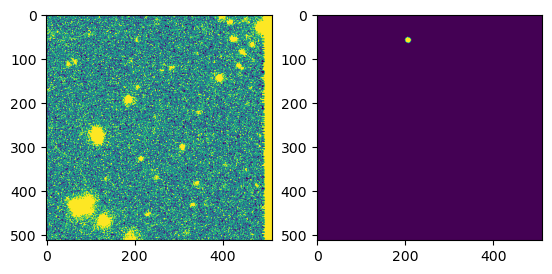

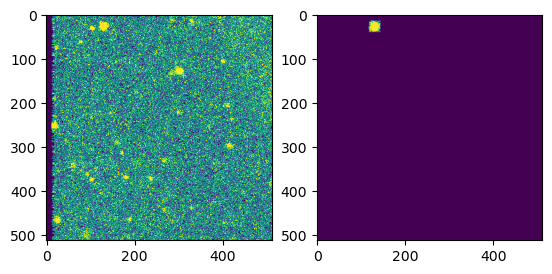

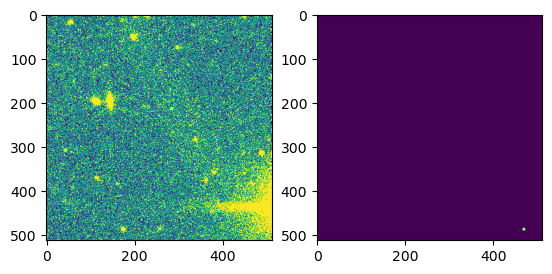

In [55]:
for i in range(split_injected_calexp.shape[0]):
    if np.any(split_mask[i,:,:]):
        fig, ax = plt.subplots(1,2)
        ax[0].imshow(np.tanh(split_injected_calexp[i,:,:]))
        ax[1].imshow(split_mask[i,:,:])
        plt.show()

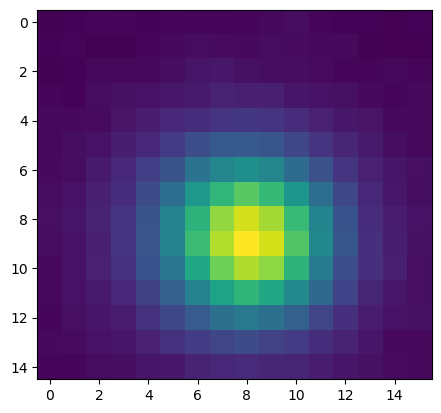

In [50]:
plt.imshow(split_injected_calexp[10,76:91, 284:300]-split_calexp[10,76:91, 284:300])

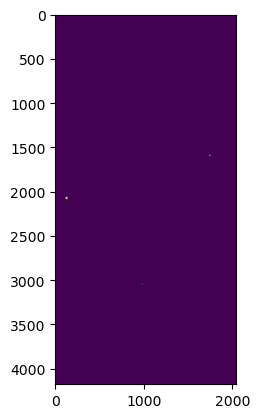

In [56]:
plt.imshow(mask)

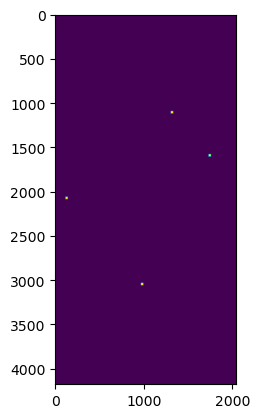

In [57]:
plt.imshow(bitwise_mask)